<a href="https://colab.research.google.com/github/JayanthPrudhivi6/JayanthPrudhivi_INFO5502_Spring2022/blob/main/lab_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (03/24/2022, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Task Decription 

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

In [32]:



# You code here:

import pandas as pd
import numpy as np
import csv as csv
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

data_train = pd.read_table("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/train_luc.csv", sep=',',header=0)

print("Total Number of samples:",data_train.shape[0],"and total number of features:",data_train.shape[1],"\n")

#Now new columns Hour, Day and Month
def hour(dt):
    return datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").time().hour
def day(dt):
    return datetime.strptime(dt,"%Y-%m-%d %H:%M:%S").day
def month(dt):
    return datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").month
data_train['hour'] = data_train['datetime'].map(hour)
data_train['day'] = data_train['datetime'].map(day)
data_train['month'] = data_train['datetime'].map(month)
data_train.head()

Total Number of samples: 9174 and total number of features: 12 



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


In [3]:
data_train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
day           0
month         0
dtype: int64

hours: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


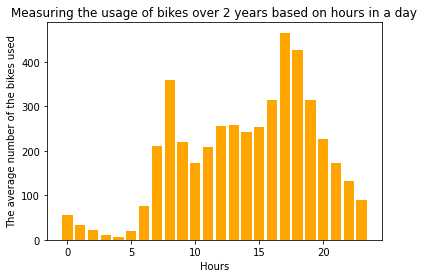

months: [ 1  2  3  4  5  6  7  8  9 10 11 12]


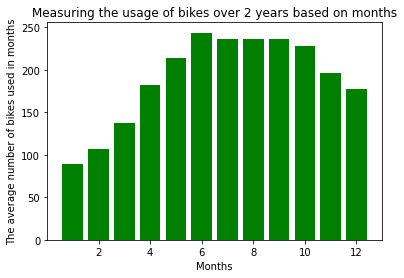

In [4]:
# now let's take a look at the average amount of bike use for each hour of the day

hours = np.unique(data_train['hour'])
print("hours:",hours)

hours_mean = {}
for h in hours:
    temp_df = data_train.loc[data_train['hour'] == h]
    hours_mean[h] = temp_df['count'].mean()

# Make a graph for the results. Perhaps there should be peaks from commuting by bike or evening use.
plt.bar(hours,[hours_mean[h] for h in hours],color='orange' )
plt.xlabel("Hours")
plt.ylabel("The average number of the bikes used")
plt.title("Measuring the usage of bikes over 2 years based on hours in a day")
plt.show()

months = np.unique(data_train['month'])
print("months:",months)

months_mean = {}
for h in months:
    temp_df = data_train.loc[data_train['month'] == h]
    months_mean[h] = temp_df['count'].mean()

# Make a graph for the results. Perhaps there should be peaks from commuting by bike or evening use.
plt.bar(months,[months_mean[h] for h in months],color = 'Green')
plt.xlabel("Months")
plt.ylabel("The average number of bikes used in months")
plt.title("Measuring the usage of bikes over 2 years based on months")
plt.show()

In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

cols = ['hour','month','season'] # taking Hour,month and season as features as bike 


X = data_train[cols]
X = preprocessing.scale(X) 
y = data_train['count'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)


from sklearn import preprocessing
from sklearn.model_selection import train_test_split

cols = ['hour','month','season'] # took Hour,month and season as features


X = data_train[cols]
X = preprocessing.scale(X) 
y = data_train['count'].values
y = preprocessing.scale(y) 
w = data_train['casual'].values
w = preprocessing.scale(w)
z = data_train['registered'].values
z= preprocessing.scale(z)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train_cas,X_test_cas,w_train,w_test = train_test_split(X,w,test_size=0.3,random_state=0)
X_train_reg,X_test_reg,z_train,z_test = train_test_split(X,z,test_size=0.3,random_state=0)
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


In [11]:
#looking for best fit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Creating parameter grid based on the results of random search 
parameter_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 500, 1000]
}
# Creating a base model
rfr = RandomForestRegressor()
# Instantiating  grid search model
grid_search = GridSearchCV(estimator = rfr, param_grid = parameter_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 288 candidates, totalling 576 fits


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 200}

In [12]:
#Importing the regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR


model = RandomForestRegressor(n_estimators = 500,max_depth=100)

print("columns selected for later:",cols)
#Lets print the model to get better know the parameters
print(model) 

columns selected for later: ['hour', 'month', 'season']
RandomForestRegressor(max_depth=100, n_estimators=500)


In [34]:
# Now Training subset is fitted into the modelfit the model 
model.fit(X_train, y_train)
model.fit(X_train_cas, w_train)
model.fit(X_train_reg, z_train)
# predicting on the testing subset of original training data
predict_count = model.predict(X_test)
predict_casual = model.predict(X_test_cas)
predict_resgistered = model.predict(X_test_reg)
# score the model on the new test set
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rms = np.sqrt(mean_squared_error(y_test,predict_count))
print("RMS error for Count Prediction:",rms)

rms_casual = np.sqrt(mean_squared_error(w_test,predict_casual))
print("RMS error for casual Prediction:",rms_casual)

rms_resgistered = np.sqrt(mean_squared_error(z_test,predict_resgistered))
print("RMS error for Registered Prediction:",rms_resgistered)

RMS error for Count Prediction: 0.7544751348246198
RMS error for casual Prediction: 0.9506623514457805
RMS error for Registered Prediction: 0.6465673955435539


In [36]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predict_count))

0.6111851443712786


In [37]:

# reading the test data
data_test = pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_06/test_luc.csv', header=0)
print("\nNumber of samples:",data_test.shape[0] ,"and number of features:",data_test.shape[1],"\n")

# For prediction purpose, the test data should be added with that new features like hour, month.
data_test['hour'] = data_test['datetime'].map(hour)
data_test['month'] = data_test['datetime'].map(month)




Number of samples: 1712 and number of features: 9 



In [38]:
data_test.head()# To check if the test output has the added columns as well as its data read correctly

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month
0,2011-01-17 00:00:00,1,1,0,2,8.20,9.850,47,15.0013,0,1
1,2011-01-17 01:00:00,1,1,0,2,8.20,9.850,44,12.9980,1,1
2,2011-01-17 02:00:00,1,1,0,2,7.38,8.335,43,16.9979,2,1
3,2011-01-17 03:00:00,1,1,0,2,7.38,9.090,43,12.9980,3,1
4,2011-01-17 04:00:00,1,1,0,2,7.38,9.850,43,8.9981,4,1


In [39]:
# Now we can fit the selected model to the train data set
model.fit( data_train[cols], data_train['count'])

# Now apply the model  to the test data for required predictions which are other than test set that is used in model selection and tuning 
# (not the "test set" you used for model selection and tuning)
predict_count = model.predict(data_test[cols])

# For further examination add the prediction column 
data_test['count'] = predict_count

# save the the csv file having the predicted count with a header column and datetime row
data_test = data_test[['datetime','count']].to_csv('prediction_RF_HMS200.csv', 
    index=False, header=True)
print("Prediction completed. Saved as prediction.csv")

Prediction completed. Saved as prediction.csv
